In [ ]:
import pandas as pd
import numpy as np
df = pd.read_csv('https://raw.githubusercontent.com/gibsonjackson/FODSIMG/main/TrainFinal.csv')
fd = df
df.head()
df.info()
df = (df-df.mean())/(df.std())
Res = df['quantitative response of LC50']
X1 = df['MLOGP']
X2 = df['RDCHI']
Y1 = Res.tolist()
X1 = X1.tolist()
X2 = X2.tolist()


dfv = pd.read_csv('https://raw.githubusercontent.com/gibsonjackson/FODSIMG/main/Validate.csv')
dfv = (dfv-dfv.mean())/(dfv.std())
fdv = df
dfv.head()
dfv.info()
Resv = dfv['quantitative response of LC50']
X1v = dfv['MLOGP']
X2v = dfv['RDCHI']
Y1v = Resv.tolist()
X1v = X1v.tolist()
X2v = X2v.tolist()


dft = pd.read_csv('https://raw.githubusercontent.com/gibsonjackson/FODSIMG/main/Test.csv')
dft = (dft-dft.mean())/(dft.std())
fdt = df
dft.head()
dft.info()
Rest = dft['quantitative response of LC50']
X1t = dft['MLOGP']
X2t = dft['RDCHI']
Y1t = Rest.tolist()
X1t = X1t.tolist()
X2t = X2t.tolist()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 393 entries, 0 to 392
Data columns (total 3 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   MLOGP                          393 non-null    float64
 1   RDCHI                          393 non-null    float64
 2   quantitative response of LC50  393 non-null    float64
dtypes: float64(3)
memory usage: 9.3 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 3 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   MLOGP                          44 non-null     float64
 1   RDCHI                          44 non-null     float64
 2   quantitative response of LC50  44 non-null     float64
dtypes: float64(3)
memory usage: 1.2 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 3 columns):
 #   Colum

In [ ]:
def hypothesis(X1,X2, theta,degree):
  Pred_Y = [0.0]*len(X1)
  for y in range(len(Pred_Y)):
    for i in range(degree+1):
      for j in range(degree+1):
        if (i+j>degree):
          break
        Pred_Y[y] = Pred_Y[y] + (theta[i][j]*pow(X1[y],i)*pow(X2[y],j))
        # print(i)
        # print(j)
  return Pred_Y

In [ ]:
def cost(X1,X2,Y,theta,degree):
    y1 = hypothesis(X1,X2,theta,degree)
    return sum(np.sqrt((y1-np.array(Y))**2))/(2*len(X1))

In [ ]:
def stochasticLinearRegression(X1,X2,Y,alpha,epoch,degree):
  theta = [ [0.0]*(degree+1) for i in range(degree+1)]
  J = []
  k = 0
  size = len(X1)
  x1=X1
  x2=X2
  po = 0
  yu = Y
  while k<epoch:
    y1 = hypothesis(X1,X2,theta,degree) #Y_pred matrix from equation using theta1x1+theta2x2+theta3
    yy = y1
    for r in range(size):
      for i in range(degree+1):
        for j in range(degree+1):
          if (i+j>degree):
            break
          
          theta[i][j]=theta[i][j]-alpha*((yy[r]-yu[r])*(x1[r]**i)*(x2[r]**j))/size
          

    k+=1
    J.append(cost(X1,X2,Y,theta,degree))
    if (k>1 and J[len(J)-2]-J[len(J)-1]<1e-6):
        po=1
        break
  return J,theta




In [ ]:
def diagram(X1,X2,Theta, degree):

  #X1=np.array(X1);
  #X2=np.array(X2);
  X1=np.arange(-1,1,0.01)
  X2=np.arange(-1,1,0.01)
  fig = plt.figure()
  ax = fig.gca(projection='3d')
  X,Y=np.meshgrid(X1,X2)
  #print(X)
  #print(Y)
  F=np.zeros(len(X1))
  index=0
  f = lambda i,j: Theta[i][j]*(X**i)*(Y**j)
  for i in range(degree+1):
    for j in range(degree+1):
      if (i+j>degree):
        break
      F = F + f(i,j)
    
  '''Z=[0.0]*len(X1)
  Z=np.array(Z)
  for i in range(degree+1):
    for j in range(degree+1):
      if(i+j>degree):
        break
      Z=Z+Theta[i][j]*sum(np.multiply(np.power(X1,i),np.transpose(np.power(X2,j))))
  #surf = ax.plot_surface(np.reshape(X,(X.shape(),Y.shape())), np.reshape(Y,(X.shape(),Y.shape())),np.reshape(Z,(X.shape(),Y.shape())), cmap=cm.coolwarm,linewidth=0, antialiased=False)
  surf=ax.contour3D(X,Y,Z,50,cmap=cm.cool)
  fig.colorbar(surf, shrink=0.5, aspect=5)'''
  ax.set_xlabel('MLOGP')
  ax.set_ylabel('RDCHI')
  ax.set_zlabel('Quantitative Eroor of LC50')
  #ax.set_zlim(0,15)
  Z=np.array(F)
  #Z=Z.reshape(len(X))
  #Z=Z[Z>=0]
  ax.plot_surface(X,Y,Z)
  plt.show()

0


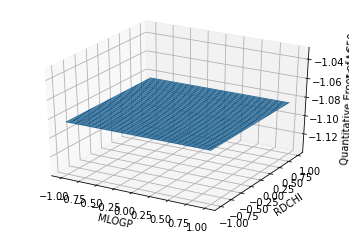

1


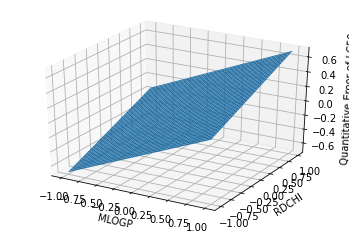

2


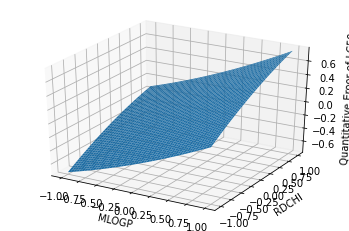

3


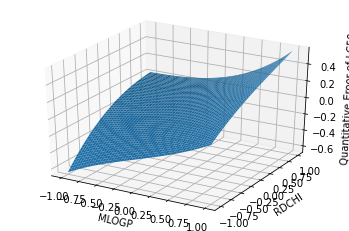

4


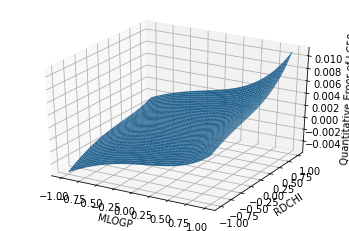

5


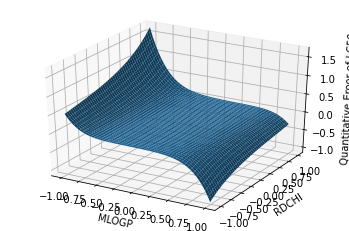

6


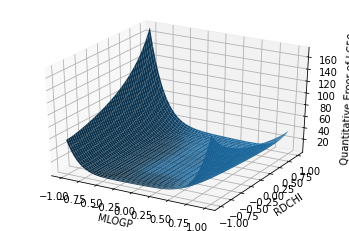

7


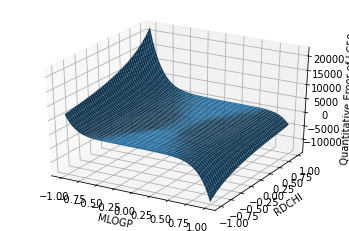

8


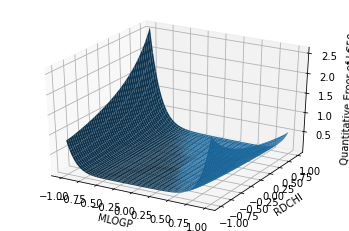

9


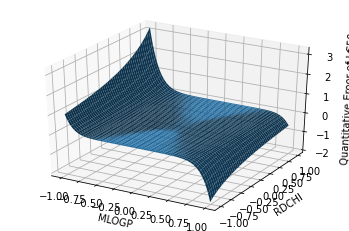

-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------  ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------  --------------------------------------------------------------------------------------------------------------------------------------------------------------------  -------------------------------------------------------------------------------------------------------------------------------------------------------------  ---------------------------------------------------------------------------------------------------------------------------------------  ---------------------------------------------------------------------------------------------------------------------------------  ---------------

In [ ]:
import matplotlib.pyplot as plt
from tabulate import tabulate
from matplotlib import cm
from mpl_toolkits import mplot3d
%matplotlib inline

allTheta=[]
for i in range(10):
  print(i)
  J,Theta = stochasticLinearRegression(X1,X2,Y1,0.001,10000,i)
  diagram(X1,X2,Theta,i)
  allTheta.append(Theta)

#diagram(X1,X2,allTheta[0],0)
print(tabulate(allTheta))

In [ ]:
from tabulate import tabulate
allThetav=[]
Jval = []
for i in range(10):
  Jv,Thetav = stochasticLinearRegression(X1v,X2v,Y1v,0.001,10000,i)
  Jval.append(Jv[len(Jv)-1])
  allThetav.append(Thetav)

print(tabulate(allThetav))

-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------  ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------  --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------  -------------------------------------------------------------------------------------------------------------------------------------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------  -----------------------------------------------------------------------------------------------------------------------

In [ ]:
#This is used to test the model against training dataset
from tabulate import tabulate
allThetat=[]
Jtest = []
for i in range(10):
  J = cost(X1t,X2t,Y1t,allThetav[i],i)
  Jtest.append(J)

print(Jtest)

[0.3844489146969004, 0.32095153919303626, 0.31380057831557856, 0.34838871744431316, 0.3619163069212255, 0.3936234604129245, 1.8688563327759429, 156.25388090057297, 7023.428245689268, 406155.78166455106]
